# Time Series with Multi Model

## Preparation

In [240]:
# list all available package
!pip list

Package                      Version             
---------------------------- --------------------
absl-py                      1.4.0               
asttokens                    2.2.1               
astunparse                   1.6.3               
attrs                        19.3.0              
Automat                      0.8.0               
Babel                        2.6.0               
backcall                     0.2.0               
blinker                      1.4                 
cachetools                   5.3.1               
certifi                      2019.11.28          
chardet                      3.0.4               
Click                        7.0                 
cloud-init                   22.3.4              
colorama                     0.4.3               
comm                         0.1.3               
command-not-found            0.3                 
configobj                    5.0.6               
constantly                   15.1.0              


In [241]:
# import necessary pacages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [242]:
df = pd.read_csv('airline-passengers.csv')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [244]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month'>

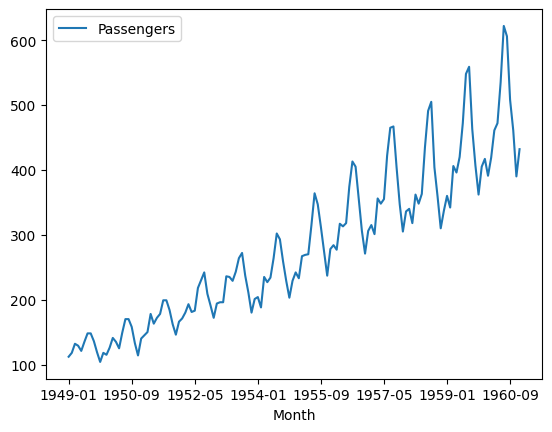

In [245]:
df.plot(x="Month", y="Passengers")

## Preprocessing

In [295]:
passengers = array(df["Passengers"])

In [296]:
data, data_actual = split_sequence(passengers, 4)
matrix_data = pd.DataFrame((data), columns=["Xt-3","Xt-2","Xt-1", "Xt"])
y_actual = pd.DataFrame((data_actual), columns=["output"])

In [315]:
matrix_data.head()

,Xt-3,Xt-2,Xt-1,Xt
0,112,118,132,129
1,118,132,129,121
2,132,129,121,135
3,129,121,135,148
4,121,135,148,148


In [325]:
X = matrix_data.drop(columns="Xt")
y = matrix_data["Xt"]

In [339]:
scaler = MinMaxScaler()

X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1)) # reshape to 1 dimentional column

In [327]:
split_percentage = 0.2

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=split_percentage, random_state=0)

In [341]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train.ravel())

BayesianRidge()

In [342]:
pred_y_model_bayesian_regression = clf.predict(X_test)

In [343]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, pred_y_model_bayesian_regression)

5738651010544.68

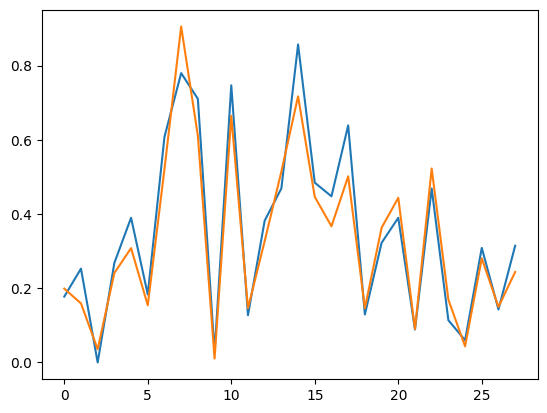

In [344]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(pred_y_model_bayesian_regression)

In [346]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train.ravel())
y_pred_MLPRegressor = regr.predict(X_test)

In [348]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred_MLPRegressor)

18040384571143.23

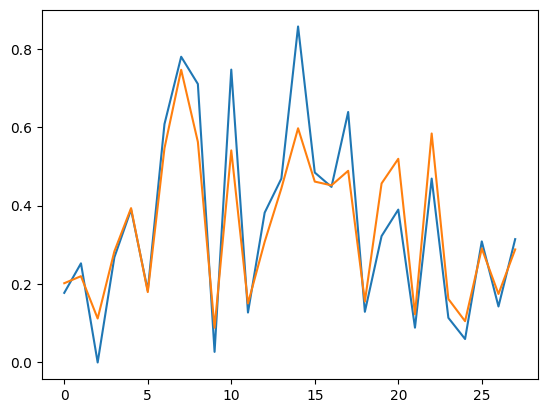

In [349]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred_MLPRegressor)

In [347]:
regr.score(X_test, y_test)

0.8487077960818805

In [275]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train.ravel())

BayesianRidge()

In [287]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

NameError: name 'prediksi' is not defined

In [ ]:
dataset_test = dataset_test.to_numpy()

In [ ]:

plt.plot(dataset_test,label = 'Penumpang real')
plt.plot(prediksi,label = 'penumpang predict')
plt.xticks(np.arange(0,19,1))
plt.title('Prediksi penumpang')
plt.xlabel('Time')
plt.ylabel('Jumlah penumpang')
plt.legend()
plt.show()

plt.show()